
image 1/1 C:\Users\\.cache\huggingface\hub\models--armvectores--yolov8n_handwritten_text_detection\snapshots\e144d41b93d51e4b4eac005c5e4a5a38bd92b44d\test_blank.png: 640x512 142 words, 192.0ms
Speed: 8.0ms preprocess, 192.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)
Results saved to detected


C:\Users\Ренал\AppData\Local\Temp\ipykernel_17904\3130304961.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(200,10))


[[     152.22      484.88      222.35      517.49]
 [     167.33      288.13      268.07      317.86]
 [      269.8      604.77      367.85      635.85]
 [     801.17      1081.2      877.42      1109.3]
 [     307.85        1083       419.8      1110.4]
 [     155.49       605.7       229.5       634.6]
 [     273.79      1122.7      352.15      1151.5]
 [     730.39      402.89      806.73      432.41]
 [     723.77      1078.1      779.73      1106.6]
 [     490.05      368.58      573.15      397.79]
 [     818.97      287.44      895.27      314.04]
 [     813.77      322.02       893.4      349.86]
 [     518.55      762.03      631.66       790.7]
 [     236.62      766.01      320.28      792.75]
 [     144.83      682.68       204.6      712.81]
 [     563.22      1163.5      645.44      1192.4]
 [     582.37      406.93      704.69      437.15]
 [     297.13      487.01      393.04      518.19]
 [     293.65      1043.4      372.79      1071.1]
 [     520.77      682.31      

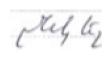

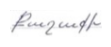

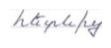

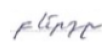

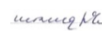

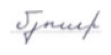

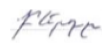

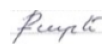

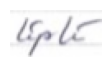

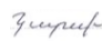

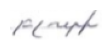

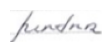

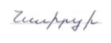

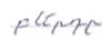

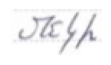

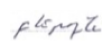

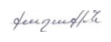

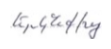

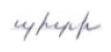

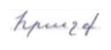

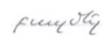

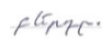

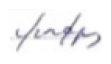

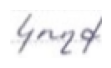

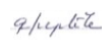

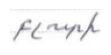

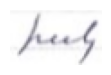

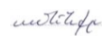

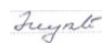

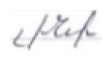

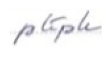

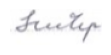

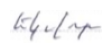

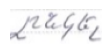

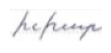

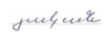

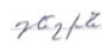

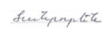

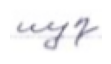

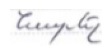

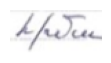

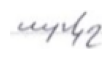

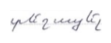

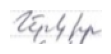

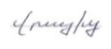

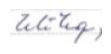

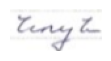

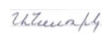

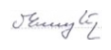

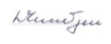

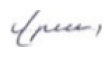

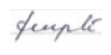

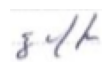

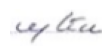

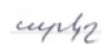

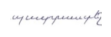

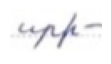

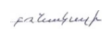

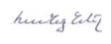

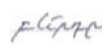

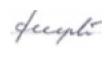

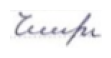

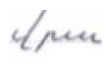

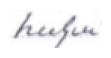

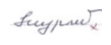

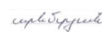

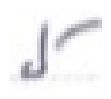

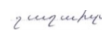

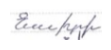

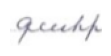

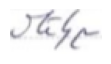

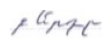

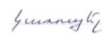

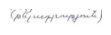

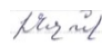

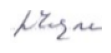

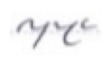

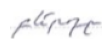

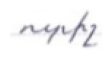

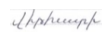

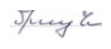

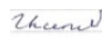

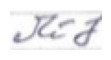

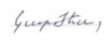

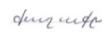

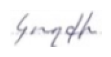

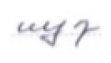

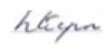

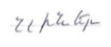

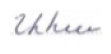

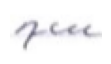

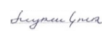

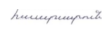

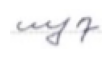

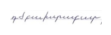

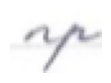

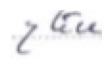

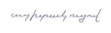

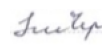

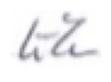

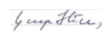

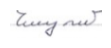

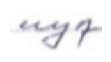

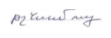

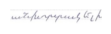

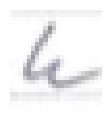

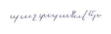

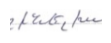

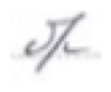

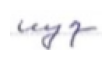

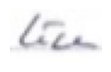

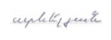

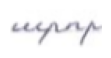

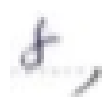

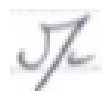

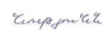

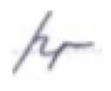

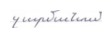

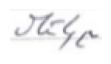

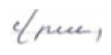

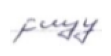

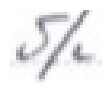

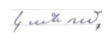

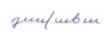

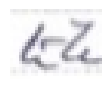

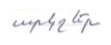

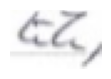

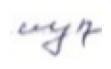

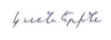

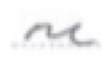

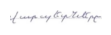

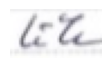

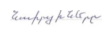

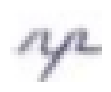

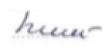

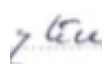

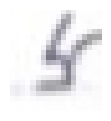

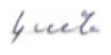

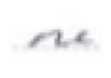

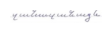

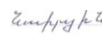

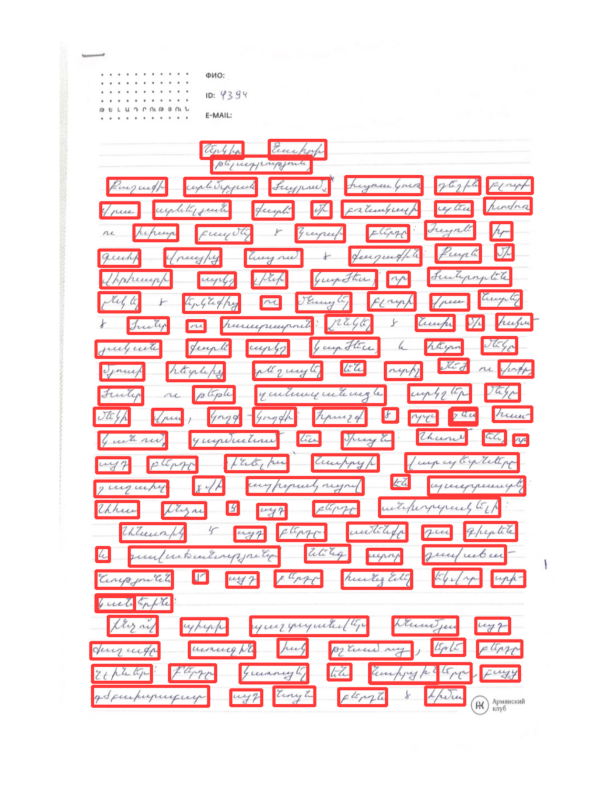

In [38]:
import numpy as np
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
from matplotlib import pyplot as plt
from PIL import Image

class Detector:
    def __init__(self):
        model_path = hf_hub_download(repo_id="armvectores/yolov8n_handwritten_text_detection",
                                     filename="best.pt")
        self.model = YOLO(model_path)

    def detect(self, img_path):
        results =  self.model.predict(source=img_path, project='.', name='detected', exist_ok=True, save=True, show=False, show_labels=False, show_conf=False, conf=0.5)
        boxes = results[0].boxes.xyxy.cpu().numpy()
        return boxes

    def extract_words(self, img_path, boxes):
        image = Image.open(img_path)
        words_images = []
        for box in boxes:
            word_image = image.crop((box[0], box[1], box[2], box[3]))
            words_images.append(word_image)
        for i, word_img in enumerate(words_images, start=1):
            plt.figure(figsize=(200,10))
            plt.subplot(1, len(words_images), i)
            plt.imshow(word_img)
            plt.axis('off')
        return words_images
detector = Detector()
test_blank_path = hf_hub_download(repo_id="armvectores/yolov8n_handwritten_text_detection",
                                  filename="test_blank.png")
boxes = detector.detect(test_blank_path)
words_images = detector.extract_words(test_blank_path, boxes)
print(boxes)

plt.figure(figsize=(15,10))
detected_image_path = 'detected/test_blank.png'
plt.imshow(plt.imread(detected_image_path))
plt.axis('off')
plt.show()


    
plt.show()

In [26]:


detector = Detector()

detector.detect("31-1.png")
print(res)


image 1/1 C:\Users\\31-1.png: 640x512 197 words, 166.2ms
Speed: 0.0ms preprocess, 166.2ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 512)
Results saved to detected


array([[     308.06,      891.48,      464.73,      934.24],
       [     1300.1,      1345.5,      1408.1,      1385.7],
       [     1020.4,      1051.7,      1104.1,      1094.8],
       [     1143.1,       430.1,      1270.6,      473.28],
       [     1142.1,      1411.7,      1265.2,      1454.5],
       [     278.99,      432.38,       439.4,      475.07],
       [     505.51,      696.36,      614.53,      735.71],
       [       1002,      1120.9,      1056.6,      1165.5],
       [     583.68,       466.5,      688.57,      506.59],
       [     355.37,      464.16,      477.07,      507.76],
       [     1337.7,      722.16,      1460.6,      765.21],
       [     945.08,      761.47,      1105.9,      805.51],
       [     1137.6,      1310.1,      1237.8,      1350.8],
       [     1310.1,      423.31,      1446.9,      470.29],
       [     656.83,      700.21,      741.39,      739.07],
       [      643.5,      894.44,      779.18,      933.61],
       [     1032.1,    

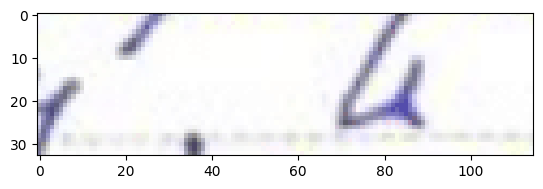

In [36]:

words=detector.extract_words("31-1.png",boxes)
for i in range(0,len(words)):
    plt.imshow(words[i])